여러분은 왜 개 사료가 예상보다 빨리 상하게 되는지를 파악하기위해 개 사료 회사에 고용되었습니다. 안 좋은 소식은 이 회사는 한동안 장비를 업그레이드 하지 않았습니다. 즉, 이 회사에서 사용하는 5가지 방부제의 사용 용량이 중구난방이라는 뜻입니다. 하지만 그 중에서 가장 많은 영향을 끼치는 것이 무엇일까요?<br>
이 회사에서는 먼저 4가지 방부제(A, B, C, D)가 함유된 방부제 묶음을 섞은 뒤 '필러'라는 화학물질로 마무리합니다. 식품과학자들은 A, B, C, D 방부제 중 하나가 문제를 일으키고 있다고 생각하지만, 그게 어떤 것인지 명확하게 하기위해 여러분이 고용됐습니다. "랜덤포레스트"로 어떤 방부제가 사료를 빨리 상하게 하는지 찾아보세요!

- Pres_A : 혼합물의 A비율
- Pres_B : 혼합물의 B비율
- Pres_C : 혼합물의 C비율
- Pres_D : 혼합물의 D비율
- Spoiled : 개 사료가 상했는지 여부를 나타내는 레이블.

**시나리오에서 요구하는 바를 고려하여, 머신러닝을 이용해서 문제를 풀어보세요.**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("./data/dog_food.csv")

In [3]:
df.head()

,A,B,C,D,Spoiled
0,4,2,12.0,3,1.0
1,5,6,12.0,7,1.0
2,6,2,13.0,6,1.0
3,4,2,12.0,1,1.0
4,4,2,12.0,3,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   A        490 non-null    int64  
 1   B        490 non-null    int64  
 2   C        490 non-null    float64
 3   D        490 non-null    int64  
 4   Spoiled  490 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 19.3 KB


In [5]:
df.shape

(490, 5)

In [6]:
df["A"]+df["B"]+df["C"]+df["D"]

0      21.0
1      30.0
2      27.0
3      19.0
4      21.0
       ... 
485    23.0
486    29.0
487    15.0
488    23.0
489    21.0
Length: 490, dtype: float64

In [7]:
df.head()

,A,B,C,D,Spoiled
0,4,2,12.0,3,1.0
1,5,6,12.0,7,1.0
2,6,2,13.0,6,1.0
3,4,2,12.0,1,1.0
4,4,2,12.0,3,1.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   A        490 non-null    int64  
 1   B        490 non-null    int64  
 2   C        490 non-null    float64
 3   D        490 non-null    int64  
 4   Spoiled  490 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 19.3 KB


In [9]:
df["A"]+df["B"]+df["C"]+df["D"]

0      21.0
1      30.0
2      27.0
3      19.0
4      21.0
       ... 
485    23.0
486    29.0
487    15.0
488    23.0
489    21.0
Length: 490, dtype: float64

- A~D열의 합이 일정하지 않으므로 %비율로 맞추기 위하여 데이터 가공 수행

In [10]:
df["All"] = df["A"]+df["B"]+df["C"]+df["D"]
# 각 열에서 전체 열의 총합을 나누면 % 비율 확인 가능

In [11]:
df.head()

,A,B,C,D,Spoiled,All
0,4,2,12.0,3,1.0,21.0
1,5,6,12.0,7,1.0,30.0
2,6,2,13.0,6,1.0,27.0
3,4,2,12.0,1,1.0,19.0
4,4,2,12.0,3,1.0,21.0


In [12]:
for i in ["A", "B", "C", "D"]:
    df["P_"+i] = df[i]/df["All"]

In [13]:
df.head()

,A,B,C,D,Spoiled,All,P_A,P_B,P_C,P_D
0,4,2,12.0,3,1.0,21.0,0.190476,0.095238,0.571429,0.142857
1,5,6,12.0,7,1.0,30.0,0.166667,0.200000,0.400000,0.233333
2,6,2,13.0,6,1.0,27.0,0.222222,0.074074,0.481481,0.222222
3,4,2,12.0,1,1.0,19.0,0.210526,0.105263,0.631579,0.052632
4,4,2,12.0,3,1.0,21.0,0.190476,0.095238,0.571429,0.142857


In [14]:
df.drop(["A", "B", "C", "D", "All"], axis = 1, inplace = True)

In [15]:
df.head()

,Spoiled,P_A,P_B,P_C,P_D
0,1.0,0.190476,0.095238,0.571429,0.142857
1,1.0,0.166667,0.200000,0.400000,0.233333
2,1.0,0.222222,0.074074,0.481481,0.222222
3,1.0,0.210526,0.105263,0.631579,0.052632
4,1.0,0.190476,0.095238,0.571429,0.142857


# 시각화

In [16]:
S = df["Spoiled"]

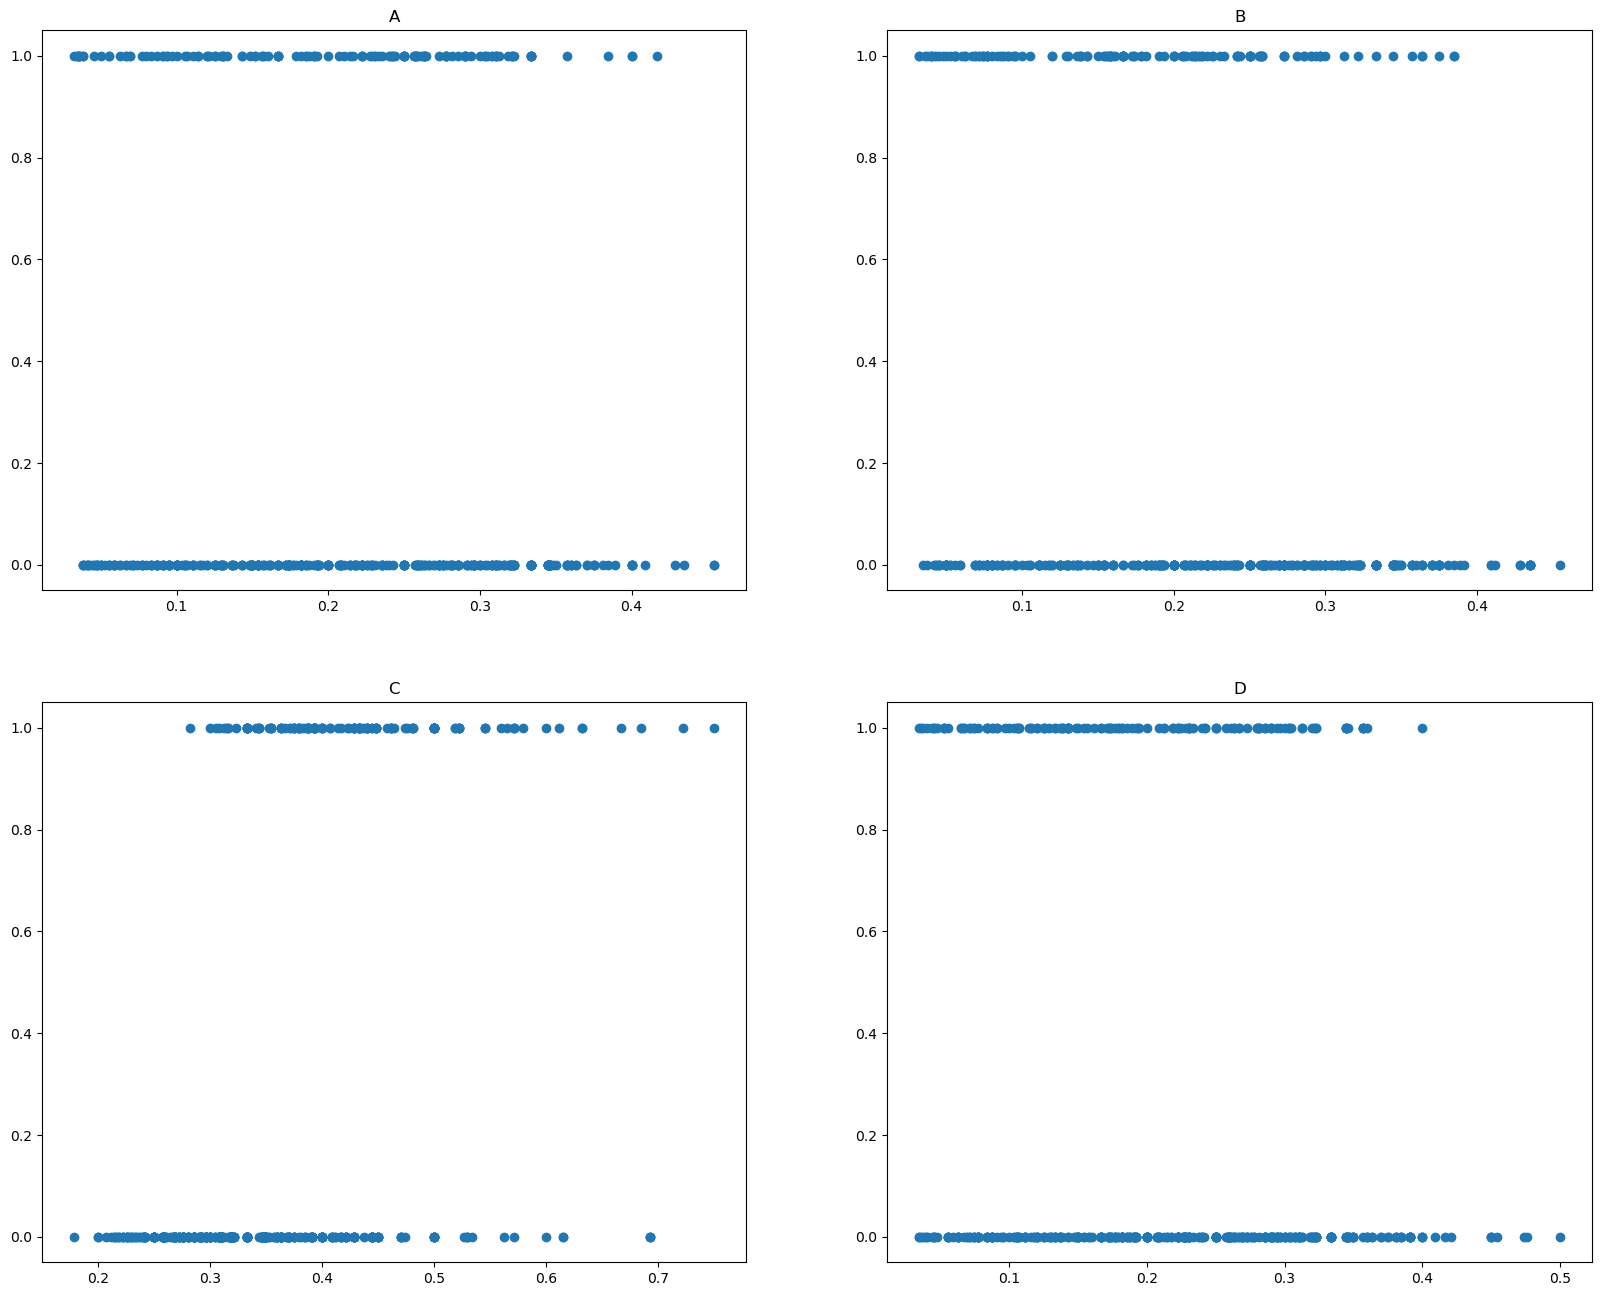

In [17]:
plt.figure(figsize = (20, 16))

plt.subplot(2, 2, 1)
plt.scatter(df["P_A"], S)
plt.title("A")
plt.subplot(2, 2, 2)
plt.scatter(df["P_B"], S)
plt.title("B")
plt.subplot(2, 2, 3)
plt.scatter(df["P_C"], S)
plt.title("C")
plt.subplot(2, 2, 4)
plt.scatter(df["P_D"], S)
plt.title("D")
plt.show()

- C의 함량비율이 약 25% 이하일 경우 사료가 상하지 않는것으로 보아 주로 C가 사료를 상하게 하는데 영향이 큰 것으로 추정됨

In [18]:
X = df.drop("Spoiled", axis = 1)
Y = df["Spoiled"]

In [19]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1)
# 훈련 / 테스트 데이터 분할

# 의사결정나무 모델로 확인하기

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
dt = DecisionTreeClassifier(max_depth=5)

In [22]:
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [23]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
print(dt.score(x_train, y_train))
print(dt.score(x_test, y_test))

0.9970845481049563
0.8027210884353742


In [24]:
print(dt.feature_importances_)

[0.25932792 0.16428829 0.44641429 0.12996949]


- 의사결정 나무 모델에 의하면 C의 영향이 가장 크며, 다음으로는 A, B, D 순으로 상하는 비율에 영향을 주는 것으로 판단

# 로지스틱 회귀 모델로 확인하기

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [26]:
ss = StandardScaler()
scaled_train = ss.fit_transform(x_train)
scaled_test = ss.transform(x_test)

In [27]:
logi = LogisticRegression()

In [28]:
logi.fit(scaled_train, y_train)

LogisticRegression()

In [29]:
logi.coef_

array([[-0.10860248, -0.35137061,  0.90581097, -0.36709693]])

In [30]:
print(logi.score(scaled_train, y_train))
print(logi.score(scaled_test, y_test))

0.7696793002915452
0.7687074829931972


- 로지스틱 회귀 모델의 경우 C 비율의 기울기가 0.91로 기울기 절댓값이 가장 크기 때문에 C의 영향이 큰 것으로 보임

# 확률적 경사하강법 모델

In [31]:
from sklearn.linear_model import SGDClassifier

In [32]:
sgd = SGDClassifier(loss = "log_loss", max_iter = 300)

In [33]:
sgd.fit(scaled_train, y_train)
print(sgd.score(scaled_train, y_train))
print(sgd.score(scaled_test, y_test))

0.7026239067055393
0.7959183673469388


In [34]:
sgd.coef_

array([[-0.44760557, -1.93379302,  2.31283877,  0.23756043]])

- 확률적 경사하강법은 C, B, A, D 순으로 영향이 크다고 분석

# statsmodel에 의한 회귀 분석

In [35]:
import statsmodels.api as sm

In [36]:
X = sm.add_constant(X)
model = sm.OLS(Y, X)
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Spoiled   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     45.03
Date:                Tue, 04 Jul 2023   Prob (F-statistic):           1.08e-25
Time:                        14:34:36   Log-Likelihood:                -245.83
No. Observations:                 490   AIC:                             499.7
Df Residuals:                     486   BIC:                             516.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0321      0.023      1.417      0.157      -0.012       0.077
P_A           -0.2783      0.139     -2.008      0.045      -0.551      -0.006
P_B           -0.7434      0.136     -5.457      0.000      -1.011      -0.476
P_C            1.6133      0.137     11.736      0.000       1.343       1.883
P_D           -0.5596      0.136     -4.114      0.000      -0.827      -0.292
==============================================================================
Omnibus:                       34.465   Durbin-Watson:                   0.437
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.772
Skew:                           0.575   Prob(JB):                     7.65e-08
Kurtosis:                       2.466   Cond. No.                     8.28e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.06e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

- statsmodel 라이브러리는 모든 피처가 유의미하다고 판단 (그중에서는 A가 가장 영향이 적음)

# 랜덤포레스트 모델

In [37]:
rf = RandomForestClassifier(max_depth=5)

In [38]:
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=5)

In [39]:
print(rf.score(x_train, y_train))
print(rf.score(x_test, y_test))

0.880466472303207
0.7755102040816326


In [40]:
rf.feature_importances_

array([0.19878024, 0.18938631, 0.45224254, 0.1595909 ])

- 랜덤포레스트 모델에 의하면 C, A ,B, D 순으로 불량율에 미치는 영향이 큼
    - 각 모델별로 영향을 덜 주는 혼합물에 대한 평가는 차이가 있으나, 모든 모델이 C가 사료를 빠르게 상하게 한다는 결과를 도출함